# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Context
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
This dataset collects information from 100k 110.527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Dataset Description

- **PatientId:** Identification of a patient.
- **AppointmentID:** Identification of each appointment.
- **Gender:** Male or Female.
- **Schedule day:** the day the patient set up an appointment day.
- **Appointment day:** the day the patient was expected to show up.
- **Age:** How old is the patient.
- **Neighbourhood:** Where the appointment takes place.
- **Scholarship:** 1 or 0.
- **Hipertension:** Value from 1 to 4.
- **Diabetes:** 1 or 0.
- **Alcoholism:** 1 or 0.
- **Handcap:** 1 or 0.
- **SMS_received:** 1 or 0.
- **No-show:** Yes or No.

    **`Scholarship`** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    
### Research Questions:

1. Dose the type of the `Gender` affect the attendance?
2. Dose `Alcoholism` affect the attendance?
3. Dose receiving `SMS` affect the attendance?
4. What is the distribution of `Ages` according to the attendance?
5. Does the `Neighbourhood` effect the attendance?
6. How can the `Age` and `Neighbourhood` can affect on the attendance together?
7. What is the most and the least chosen `AppointmentDay` in the week according to the Attendance?
8. What is the oldest `Age` recorded in the database?
9. What is the Central Tendency of the `Age`?
10. What is the measure of spread for the `Age`?
11. What are the least 5 `Neighbourhoods` who have the least number of patients?

<a id='wrangling'></a>
## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#pd.set_option('display.max_rows', 100)
df = pd.read_csv('NoShowApp2016.csv')
df.head(5)
#df.sample(100)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

**Removing unnecessary Columns.**

In [3]:
df.drop(columns = ['ScheduledDay'], inplace = True)
df.head(2)

PatientId  AppointmentID Gender        AppointmentDay  Age  \
0  2.987250e+13        5642903      F  2016-04-29T00:00:00Z   62   
1  5.589978e+14        5642503      M  2016-04-29T00:00:00Z   56   

     Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0  JARDIM DA PENHA            0             1         0           0        0   
1  JARDIM DA PENHA            0             0         0           0        0   

   SMS_received No-show  
0             0      No  
1             0      No

**Changing AppointmentDay Column to be as a Date Format**

In [4]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
#df.AppointmentDay.dtype
df['Day'] = df['AppointmentDay'].dt.day_name()
df.head(2)

PatientId  AppointmentID Gender            AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 00:00:00+00:00   62   
1  5.589978e+14        5642503      M 2016-04-29 00:00:00+00:00   56   

     Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0  JARDIM DA PENHA            0             1         0           0        0   
1  JARDIM DA PENHA            0             0         0           0        0   

   SMS_received No-show     Day  
0             0      No  Friday  
1             0      No  Friday

**Fixing Some Columns' Names.**

In [5]:
df.rename({'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap', 'No-show' : 'Missed'}, axis = 'columns', inplace=True)
df.head(2)

PatientId  AppointmentID Gender            AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 00:00:00+00:00   62   
1  5.589978e+14        5642503      M 2016-04-29 00:00:00+00:00   56   

     Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0  JARDIM DA PENHA            0             1         0           0         0   
1  JARDIM DA PENHA            0             0         0           0         0   

   SMS_received Missed     Day  
0             0     No  Friday  
1             0     No  Friday

Awesome, this is now much better.

**Now, Let's get more info about our dataset.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int64              
 5   Neighbourhood   110527 non-null  object             
 6   Scholarship     110527 non-null  int64              
 7   Hypertension    110527 non-null  int64              
 8   Diabetes        110527 non-null  int64              
 9   Alcoholism      110527 non-null  int64              
 10  Handicap        110527 non-null  int64              
 11  SMS_received    110527 non-null  int64              
 12  Missed          110527 non-null  object             
 13  Day           

In [7]:
# I don't know why this function puts my My Python interpreter in infinite loop!!
#pd.plotting.scatter_matrix(df); 

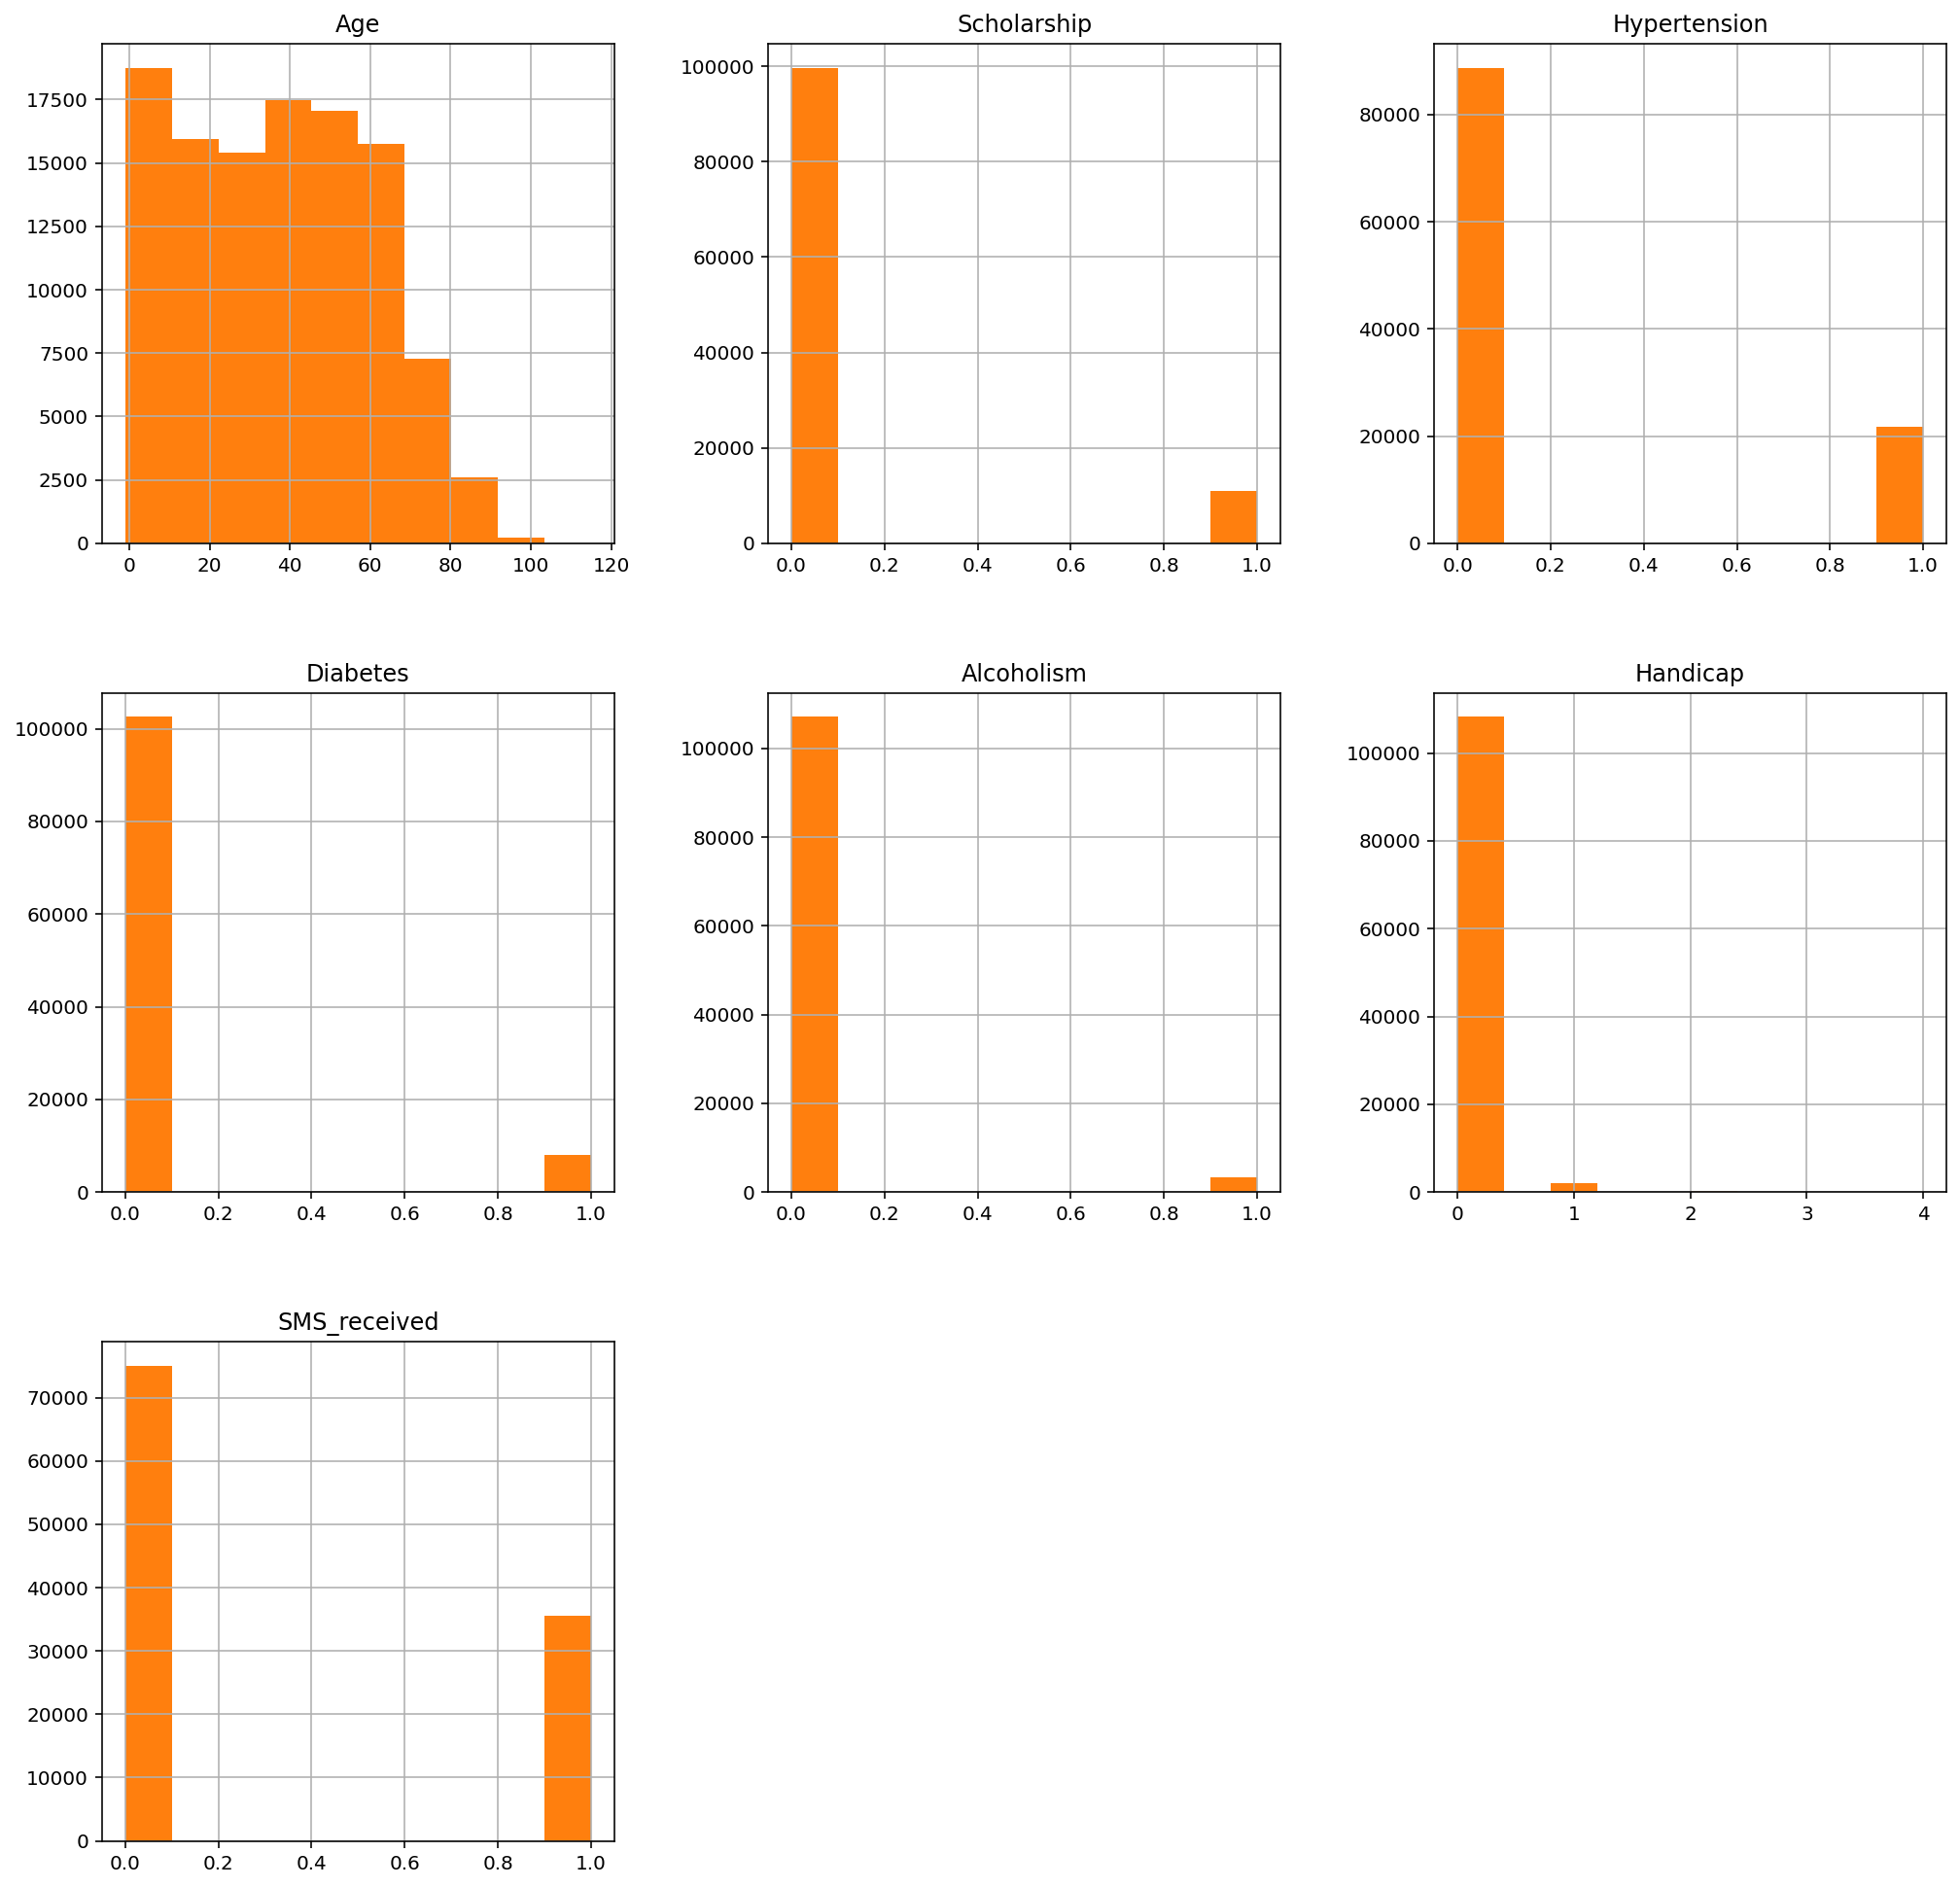

In [8]:
fig = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Missed']
df.hist(column = fig, figsize = (17, 17), color = 'C1');

['F' 'M']
<class 'numpy.ndarray'>
F    71840
M    38687
Name: Gender, dtype: int64
<class 'pandas.core.series.Series'>


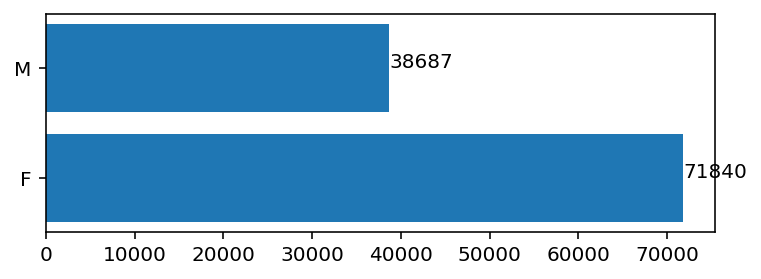

We can see the ratio between the two Genders is equal to 1.86 F/M.


In [9]:
#df.Gender.value_counts().plot(kind = 'bar');
y = df.Gender.unique()
print(y)
print(type(y))
x = df.Gender.value_counts()
print(x)
print(type(x))
plt.barh(y, x)
plt.gcf().set_size_inches(6, 2)
for index, value in enumerate(x):
    plt.text(value, index, str(value))
plt.show()
print("We can see the ratio between the two Genders is equal to {:.2f} F/M.".format(df.Gender.value_counts()[0]/df.Gender.value_counts()[1]))

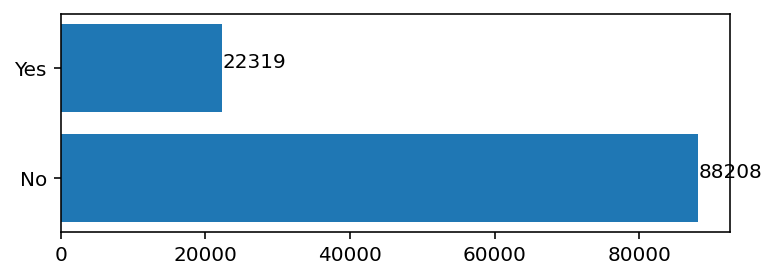

We can see the ratio between those who attended and those who did not is equal to 3.95 Attended/Missed.


In [10]:
#df.Missed.value_counts().plot(kind = 'barh', figsize = (6,2));
y = df.Missed.unique()
x = df.Missed.value_counts()
plt.barh(y,x)
plt.gcf().set_size_inches(6,2)
for index, value in enumerate(x):
    plt.text(value, index, str(value))
plt.show()
print("We can see the ratio between those who attended and those who did not is equal to {:.2f} Attended/Missed.".format(df.Missed.value_counts()[0]/df.Missed.value_counts()[1]))

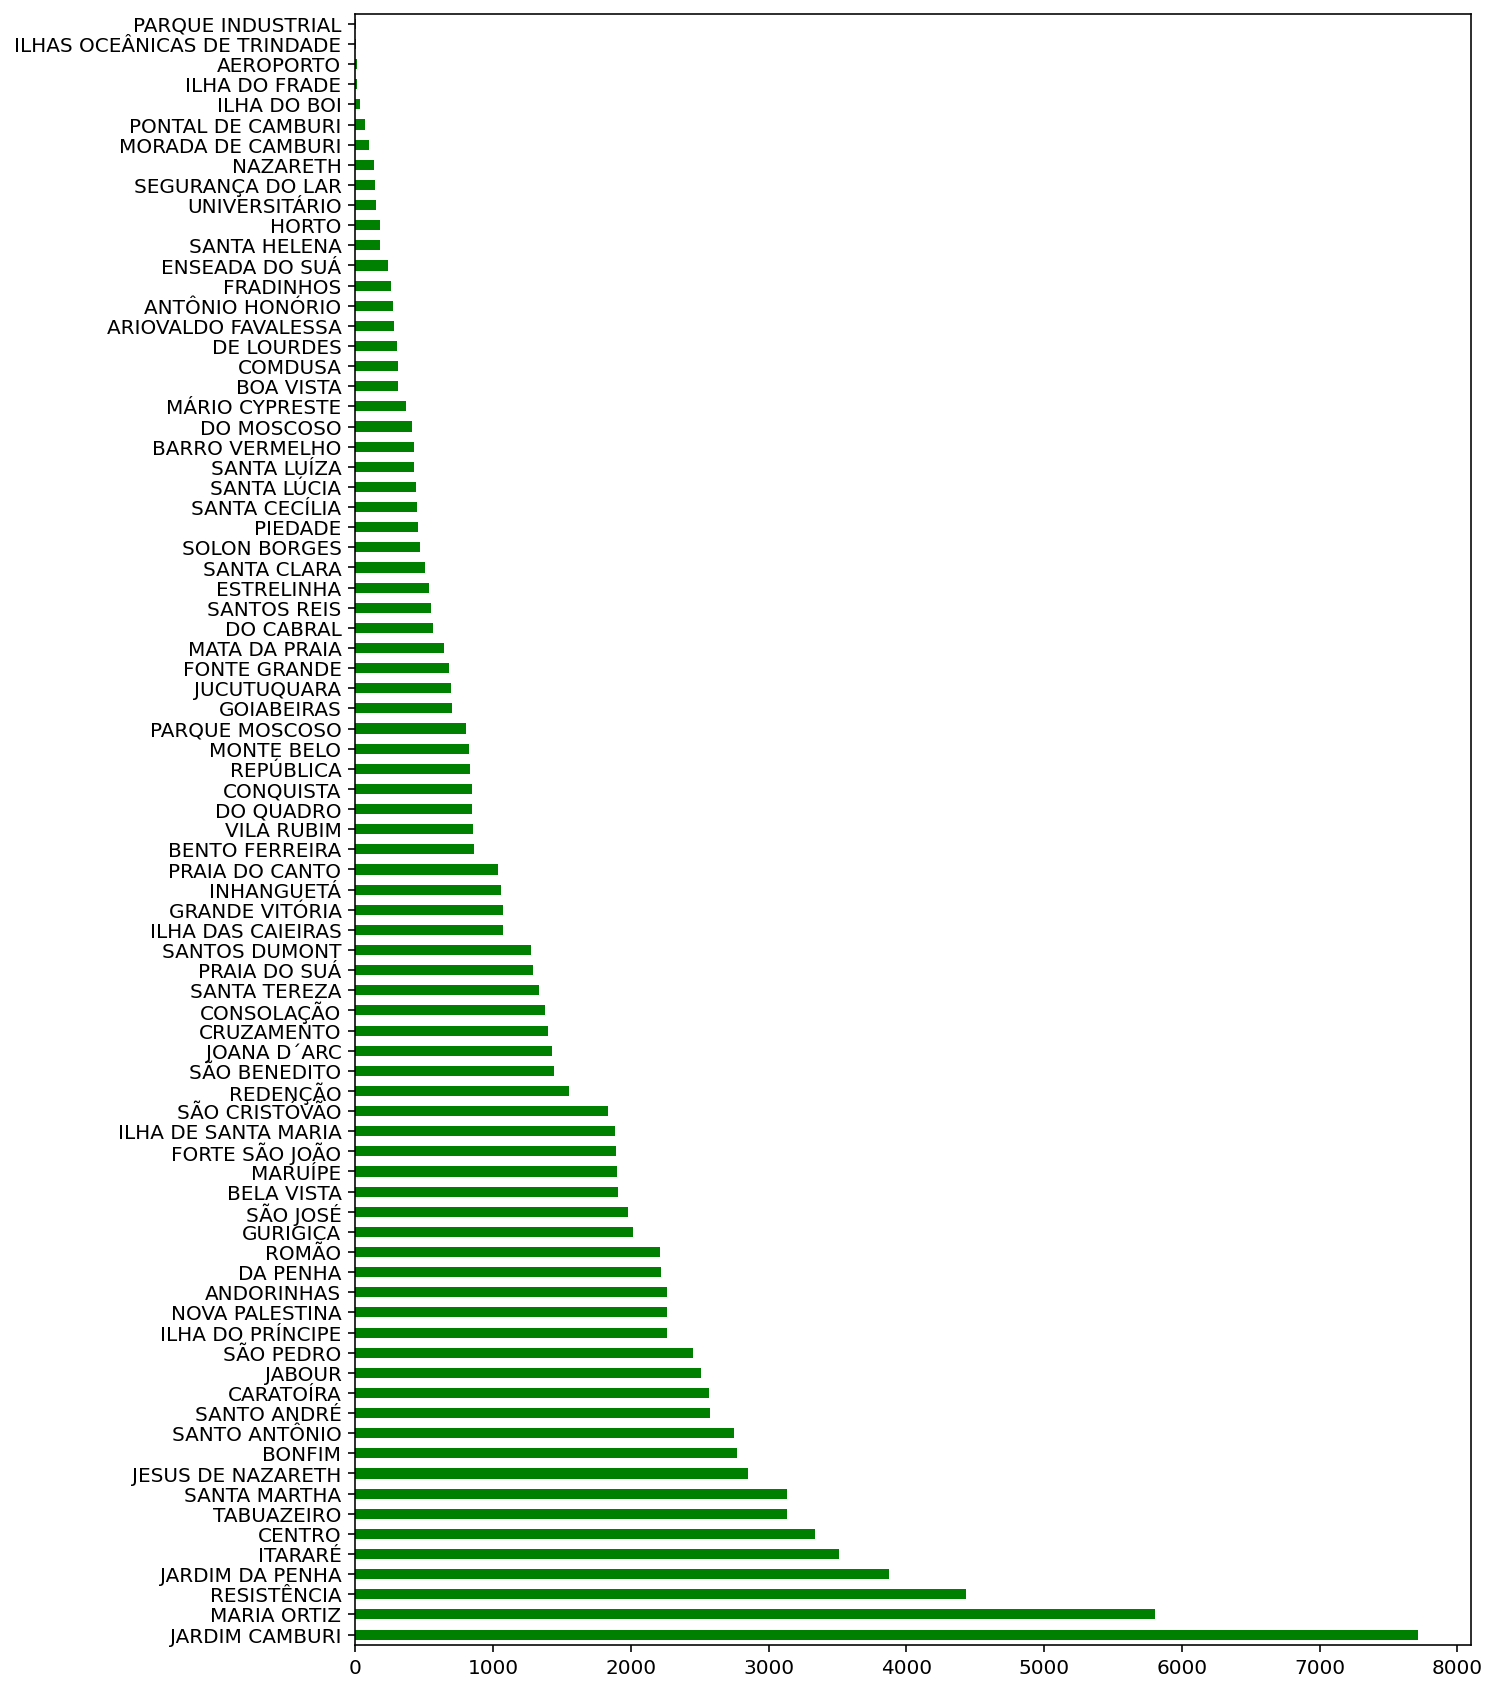

In [11]:
df.Neighbourhood.value_counts().plot(kind = 'barh', figsize = (10,15), color = 'g');

In [12]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hypertension       Diabetes     Alcoholism       Handicap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [13]:
df.Handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

### I have noticed that:
- There is one value in `Age` which is `-1`, that does not make any sense! It should be changed in the data cleaning section.
- `Handicap` column has values from `0` to `4`. 
- After some researches, I have found on kaggle this [info](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356) from the data set creator stating that the numbers in `Handicap` column refers to the amount of disabilities that the patient is suffering from. so nothing to be changed.

**Lets check for duplicates.**

In [14]:
print('Number of duplicated Rows: {}'.format(df.duplicated().sum()))
print('Number of duplications in PatientID column: {}'.format(df.PatientId.duplicated().sum()))
print('Number of duplications in AppointmentID column: {}'.format(df.AppointmentID.duplicated().sum()))


Number of duplicated Rows: 0
Number of duplications in PatientID column: 48228
Number of duplications in AppointmentID column: 0


**We can see that:**

No Duplicated Rows in the dataset.

`PatientID` has `48228` duplicates.

`AppointmentID` has no duplicates.

That makes sence, because same patient could have several appointments.

### Data Cleaning

**Lets Now change that wrong value in column `Age`**

In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.loc[df.Age == -1,'Age'] = 1
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088892       0.098266   
std    2.560949e+14   7.129575e+04      23.110176       0.297675   
min    3.921784e+04   5.030230e+06       0.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hypertension       Diabetes     Alcoholism       Handicap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

Great job so far.

<a id='eda'></a>
## Exploratory Data Analysis

**Since our main goal is to find why patients miss their appointments?**

Let us divide our Patients into two groups; those who attended and those who did not.

In [16]:
attended = df[df.Missed == 'No']
not_attended = df[df.Missed == 'Yes']
print('Attended Patients Number: {}'.format(attended.shape[0]))
print('Not-Attended Patients Number: {}'.format(not_attended.shape[0]))
print('Ratio between those who attended and those who did not attended: {:.2f} (A/N)'.format(attended.shape[0]/not_attended.shape[0]))
# print("Attended {}:\n{}".format(type(attended), attended))
# print("Not Attended {}:\n{}".format(type(not_attended), not_attended))

Attended Patients Number: 88208
Not-Attended Patients Number: 22319
Ratio between those who attended and those who did not attended: 3.95 (A/N)


### Research Question Number 1

#### Dose the type of the `Gender` affect the attendance?

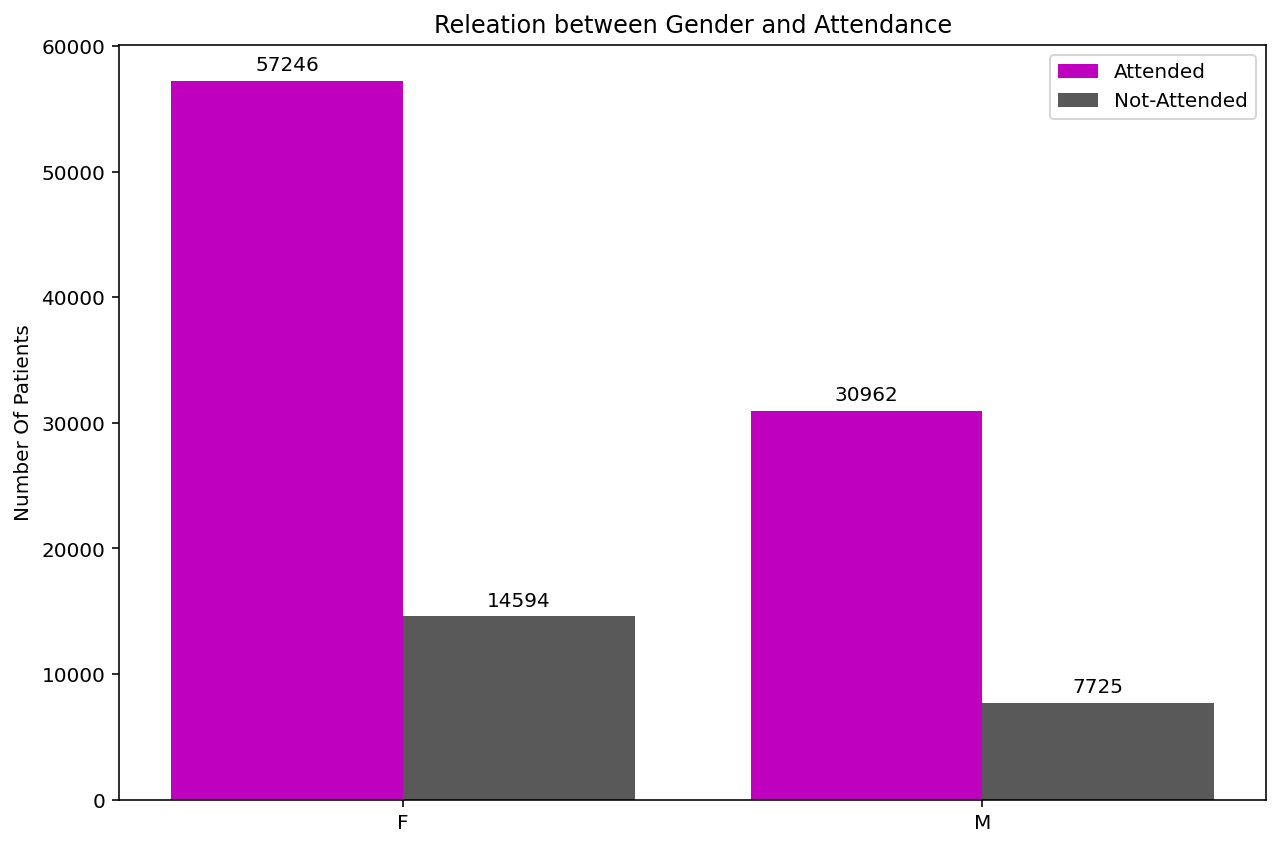

The Ratio between who Attended and who did not attend given that the patient is Male 4.01 (A/N)
The Ratio between who Attended and who did not attend given that the patient is Female 3.92 (A/N)


In [17]:
x_labels = df.Gender.unique() # x-axis labels
#print(x_labels, len(x_labels))
gen_attended_val = attended.Gender.value_counts() # attended y-axis value
gen_not_attended_val = not_attended.Gender.value_counts() #not-attended y-axis value
x = np.arange(len(x_labels)) # our labels' locations
width = 0.4 # bar width 
fig, ax = plt.subplots(figsize = (9,6))
rec1 = ax.bar(x - width/2, gen_attended_val, width, label = 'Attended', color = 'm')
rec2 = ax.bar(x + width/2, gen_not_attended_val, width, label = 'Not-Attended', color = '0.35')
# add some text to the fig
ax.set_ylabel('Number Of Patients')
ax.set_title('Releation between Gender and Attendance')
ax.set_xticks(x, labels = x_labels) # need latest matplot lib 3.5 to accept lebels in it. other wise you will need to remove it from here and uncommnet the next line
#ax.set_xticklabels(x_labels)
ax.legend()

ax.bar_label(rec1, padding = 3)
ax.bar_label(rec2, padding = 3)

fig.tight_layout()

plt.show()

print("The Ratio between who Attended and who did not attend given that the patient is Male {:.2f} (A/N)".format(gen_attended_val[1]/gen_not_attended_val[1]))
print("The Ratio between who Attended and who did not attend given that the patient is Female {:.2f} (A/N)".format(gen_attended_val[0]/gen_not_attended_val[0]))

# fig, ax = plt.subplots()
# ax.hist(attended.Gender, label = 'Attended')
# ax.hist(not_attended.Gender, label = 'Not-Attended')
# ax.set_title("Releation between Gender and Attendance")
# ax.set_xlabel("Gender Type")
# ax.set_ylabel("Number Of Patients")
# ax.legend(loc = "upper right")
# plt.show();


**The Previouse solution using Function form**

In [18]:
def poltSideBySideBars(x_labels, bar1_val, bar2_val, bar1_name, bar2_name, y_label, title, xfig_size = 9, yfig_size = 6):
    x = np.arange(len(x_labels)) # our labels' locations
    width = 0.4 # bar width 
    fig, ax = plt.subplots(figsize = (xfig_size, yfig_size))
    rec1 = ax.bar(x - width/2, bar1_val, width, label = bar1_name)
    rec2 = ax.bar(x + width/2, bar2_val, width, label = bar2_name)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x, labels = x_labels) # need latest matplot lib 3.5 to accept lebels in it. other wise you will need to remove it from here and uncommnet the next line
    #ax.set_xticklabels(x_labels)
    ax.legend()
    ax.bar_label(rec1, padding = 3)
    ax.bar_label(rec2, padding = 3)
    fig.tight_layout()
    plt.show()

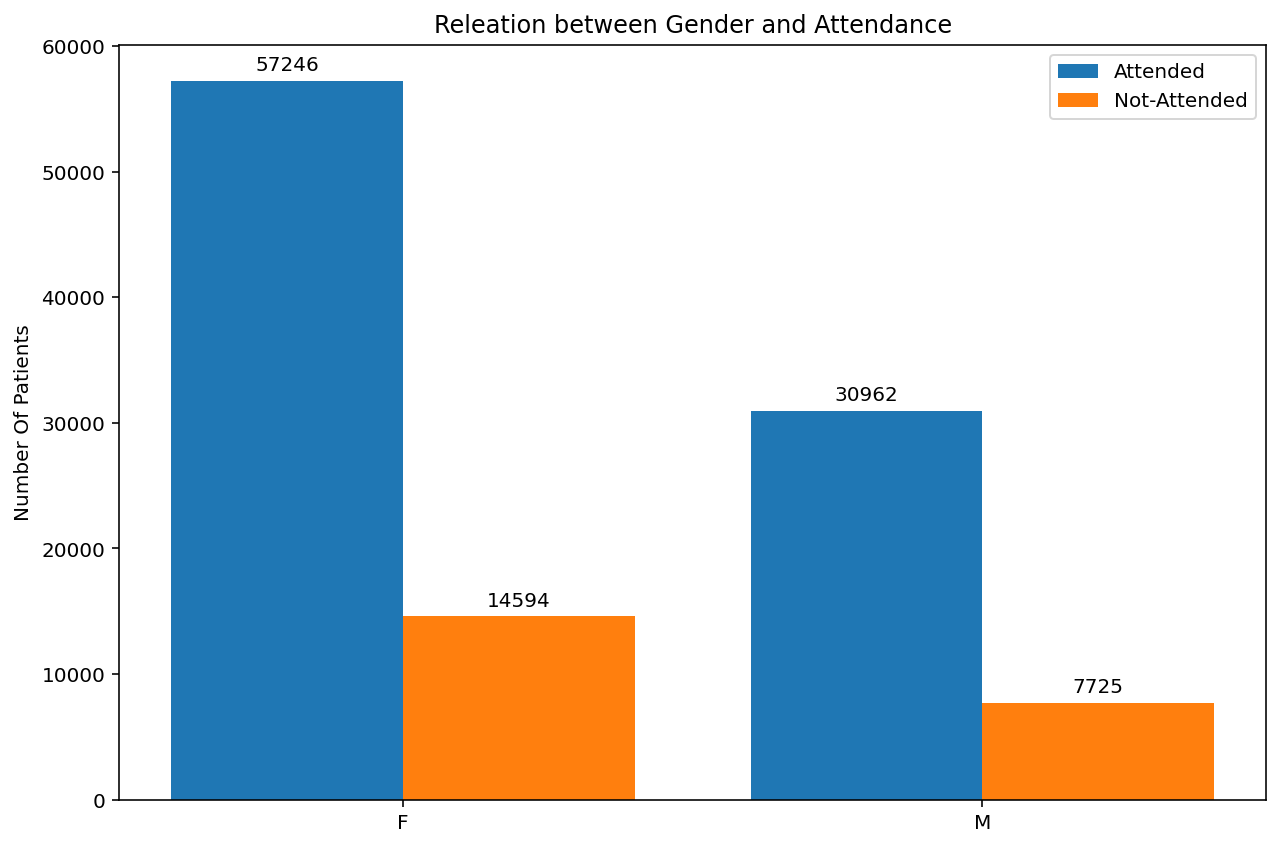

The Ratio between who Attended and who did not attend given that the patient is Male 4.01 (A/N)
The Ratio between who Attended and who did not attend given that the patient is Female 3.92 (A/N)


In [19]:
x_labels = df.Gender.unique() # x-axis labels
gen_attended_val = attended.Gender.value_counts() # attended y-axis value
gen_not_attended_val = not_attended.Gender.value_counts() #not-attended y-axis value
# calling the function ...
poltSideBySideBars(x_labels, gen_attended_val, gen_not_attended_val, 'Attended', 
                   'Not-Attended', 'Number Of Patients', 'Releation between Gender and Attendance')
print("The Ratio between who Attended and who did not attend given that the patient is Male {:.2f} (A/N)".format(gen_attended_val[1]/gen_not_attended_val[1]))
print("The Ratio between who Attended and who did not attend given that the patient is Female {:.2f} (A/N)".format(gen_attended_val[0]/gen_not_attended_val[0]))


**Trying to plot it using Seaborn.**

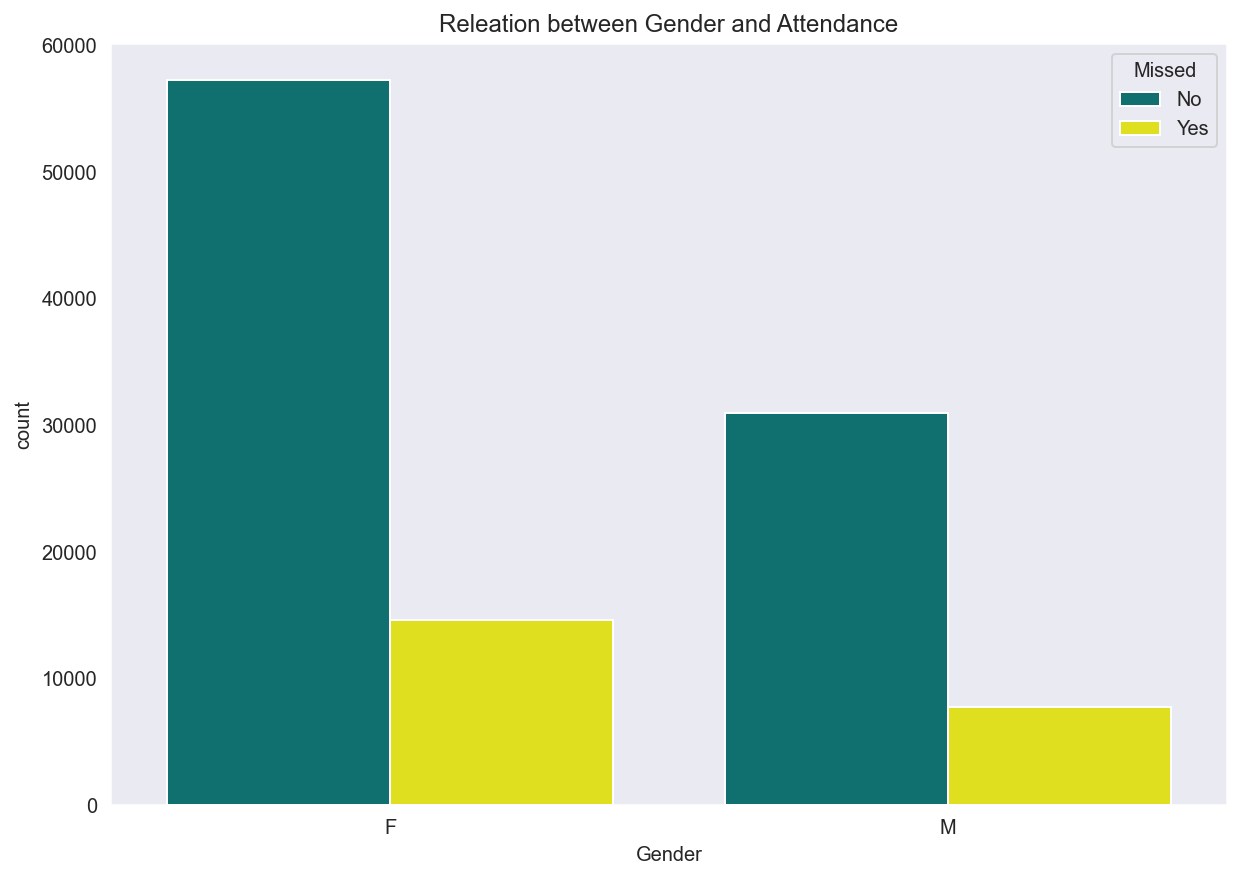

In [20]:
sns.set_style('dark')
plt.figure(figsize=(10,7))
ax = sns.countplot(data = df, x = 'Gender', hue = 'Missed', palette=["teal","yellow"])
ax.set_title('Releation between Gender and Attendance')
plt.show()

### Research Question Number 2

#### Dose `Alcoholism` affect the attendance?

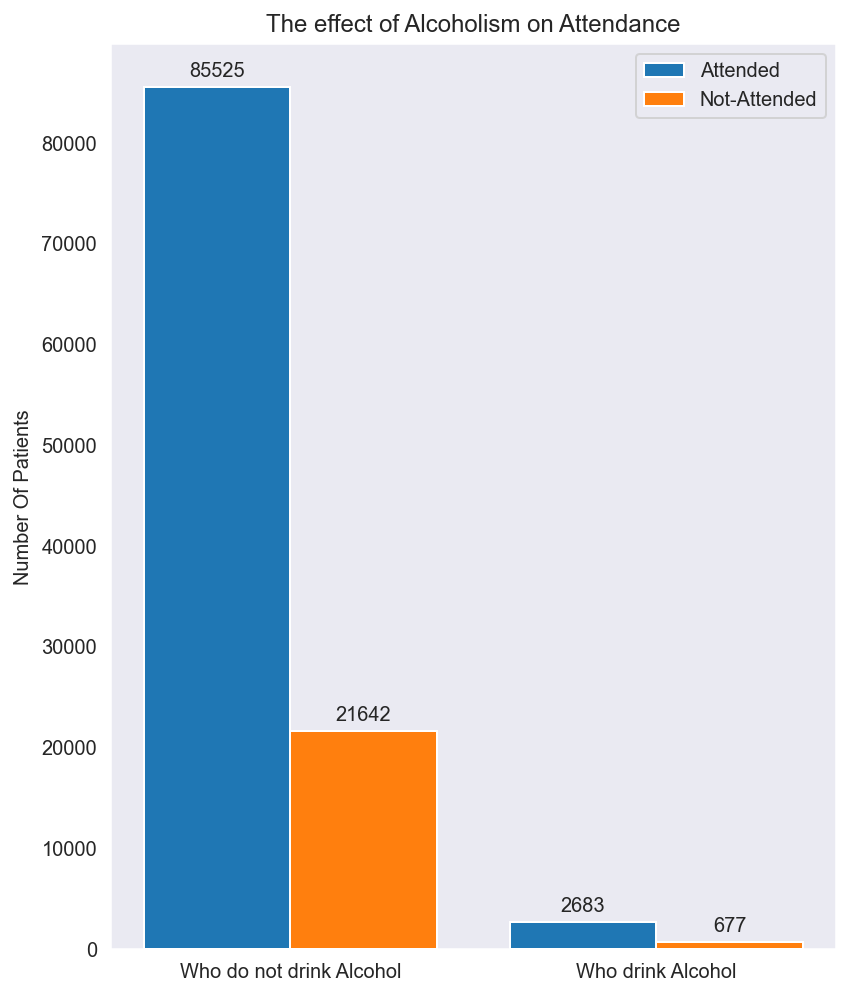

The Ratio between who Attended and who did not attend given that Alcoholism 3.96 (A/N)
The Ratio between who Attended and who did not attend given that NO Alcoholism 3.95 (A/N)


In [21]:
x_labels = ['Who do not drink Alcohol', 'Who drink Alcohol']
alc_attended_val = attended.Alcoholism.value_counts()
alc_not_attended_val = not_attended.Alcoholism.value_counts()
# print(alc_attended_val)
# print(alc_not_attended_val)
# calling the function ...
poltSideBySideBars(x_labels, alc_attended_val, alc_not_attended_val, 'Attended', 
                   'Not-Attended', 'Number Of Patients', 'The effect of Alcoholism on Attendance', 6, 7)
print("The Ratio between who Attended and who did not attend given that Alcoholism {:.2f} (A/N)".format(alc_attended_val[1]/alc_not_attended_val[1]))
print("The Ratio between who Attended and who did not attend given that NO Alcoholism {:.2f} (A/N)".format(alc_attended_val[0]/alc_not_attended_val[0]))


### Research Question Number 3

#### Dose receiving `SMS` affect the attendance?

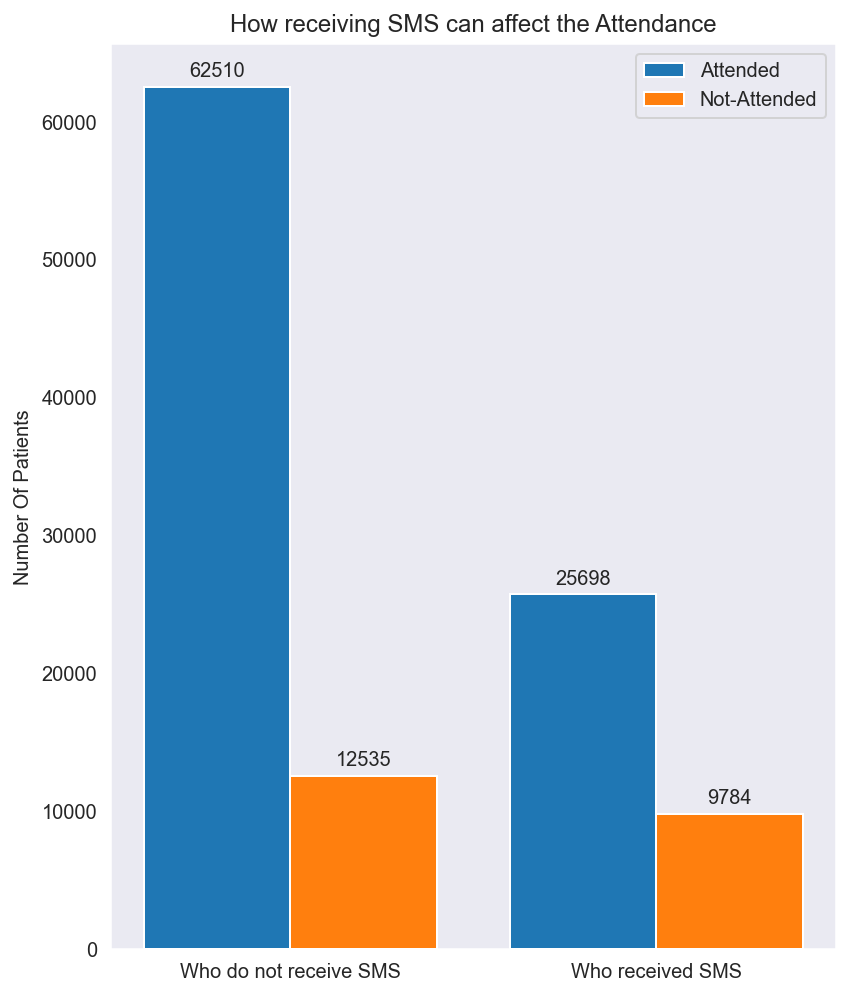

The Ratio between who Attended and who did not attend given that SMS Received 2.63 (A/N)
The Ratio between who Attended and who did not attend given that NO SMS Received 4.99 (A/N)


In [22]:
x_labels = ['Who do not receive SMS', 'Who received SMS']
sms_attended_val = attended.SMS_received.value_counts()
sms_not_attended_val = not_attended.SMS_received.value_counts()
# print(sms_attended_val)
# print(sms_not_attended_val)
# calling the function ...
poltSideBySideBars(x_labels, sms_attended_val, sms_not_attended_val, 'Attended', 
                   'Not-Attended', 'Number Of Patients', 'How receiving SMS can affect the Attendance', 6, 7)
print("The Ratio between who Attended and who did not attend given that SMS Received {:.2f} (A/N)".format(sms_attended_val[1]/sms_not_attended_val[1]))
print("The Ratio between who Attended and who did not attend given that NO SMS Received {:.2f} (A/N)".format(sms_attended_val[0]/sms_not_attended_val[0]))


### Research Question Number 4

#### What is the distribution of `Ages` according to the attendance?

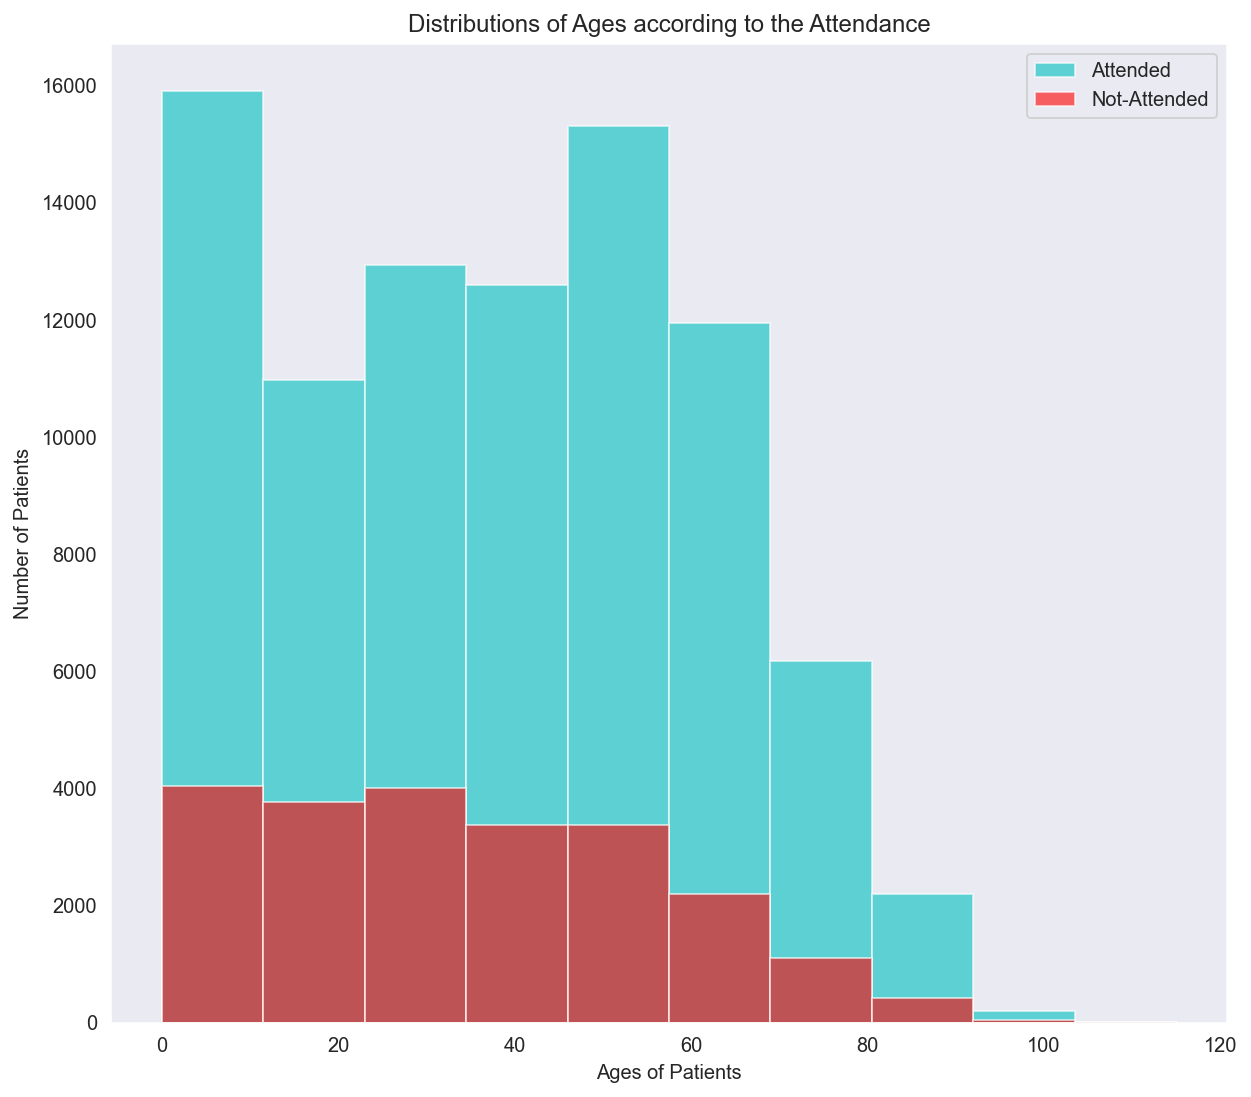

In [23]:
fig, ax = plt.subplots(figsize = (10,9))
ax.hist(attended.Age, alpha = 0.6, label = 'Attended', color = 'c')
ax.hist(not_attended.Age, alpha = 0.6, label = 'Not-Attended', color = 'r')
ax.set_title('Distributions of Ages according to the Attendance')
ax.set_xlabel('Ages of Patients')
ax.set_ylabel('Number of Patients')
ax.legend()
plt.show()

**The Previouse solution using Function form**

In [24]:
def plotTwoHist(column1, column2, col1_label, col2_label, title, x_label, y_label, xfig_size = 10, yfig_size = 9):
    fig, ax = plt.subplots(figsize = (xfig_size, yfig_size))
    ax.hist(column1, alpha = 0.6, label = 'Attended')
    ax.hist(column2, alpha = 0.6, label = 'Not-Attended')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    plt.show()

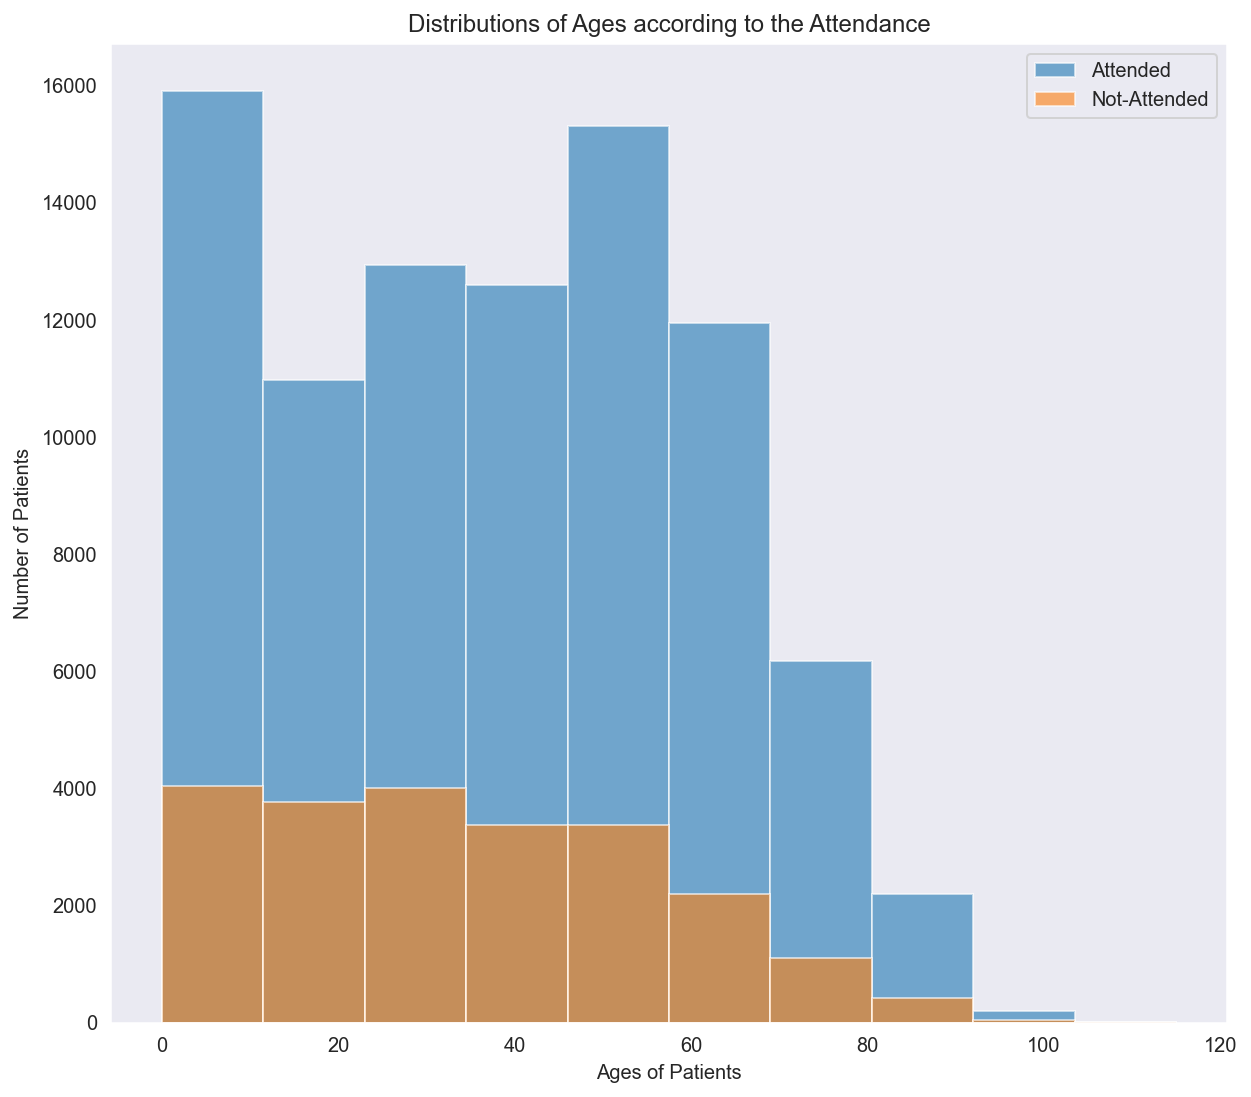

In [25]:
col1 = attended.Age
col2 = not_attended.Age
# calling the function ...
plotTwoHist(col1, col2, 'Attended', 'Not-Attended', 
            'Distributions of Ages according to the Attendance', 'Ages of Patients', 'Number of Patients')


**Trying to plot it with different graph using Seaborn.**

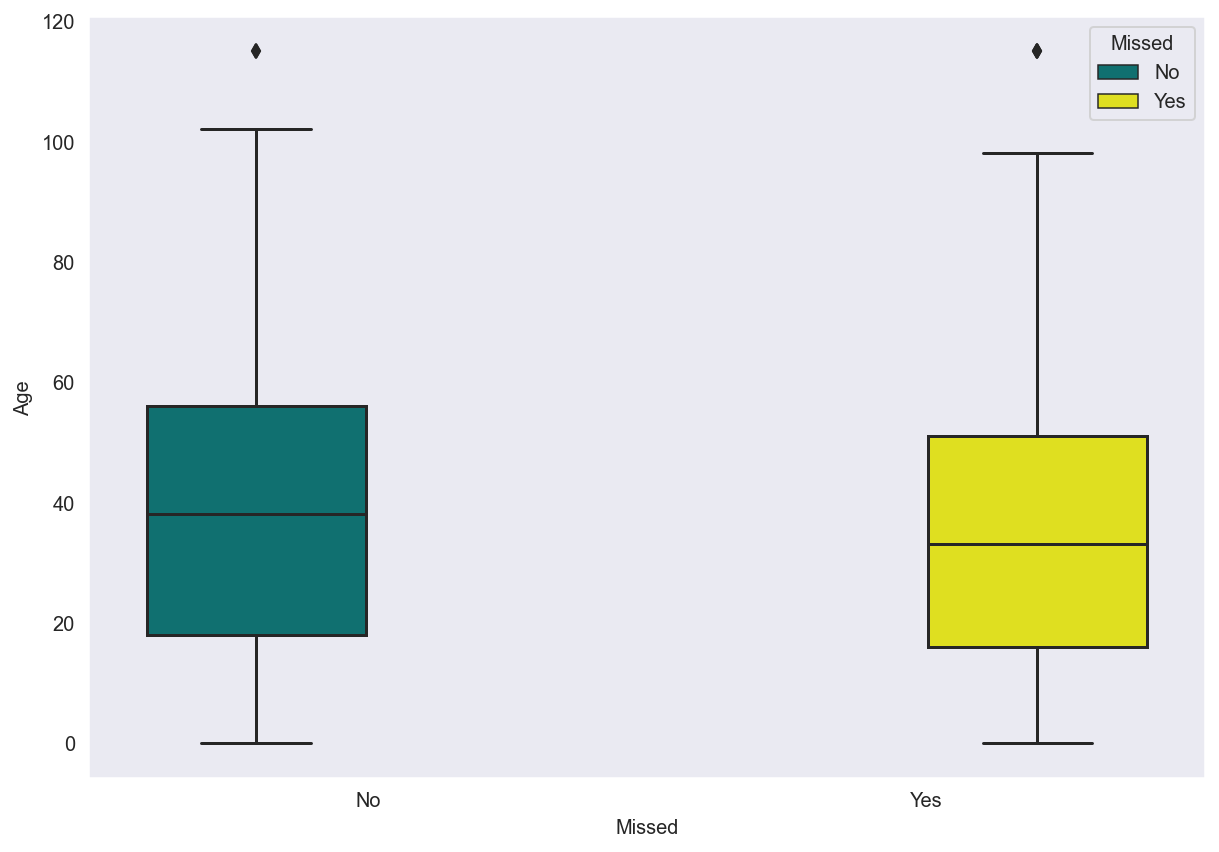

As we can see another visualization for the answer using the boxplot.


In [26]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data = df, x = 'Missed', y= 'Age', hue = 'Missed', palette=["teal","yellow"])
plt.show()
print('As we can see another visualization for the answer using the boxplot.')

### Research Question Number 5

#### Does the `Neighbourhood` effect the attendance?

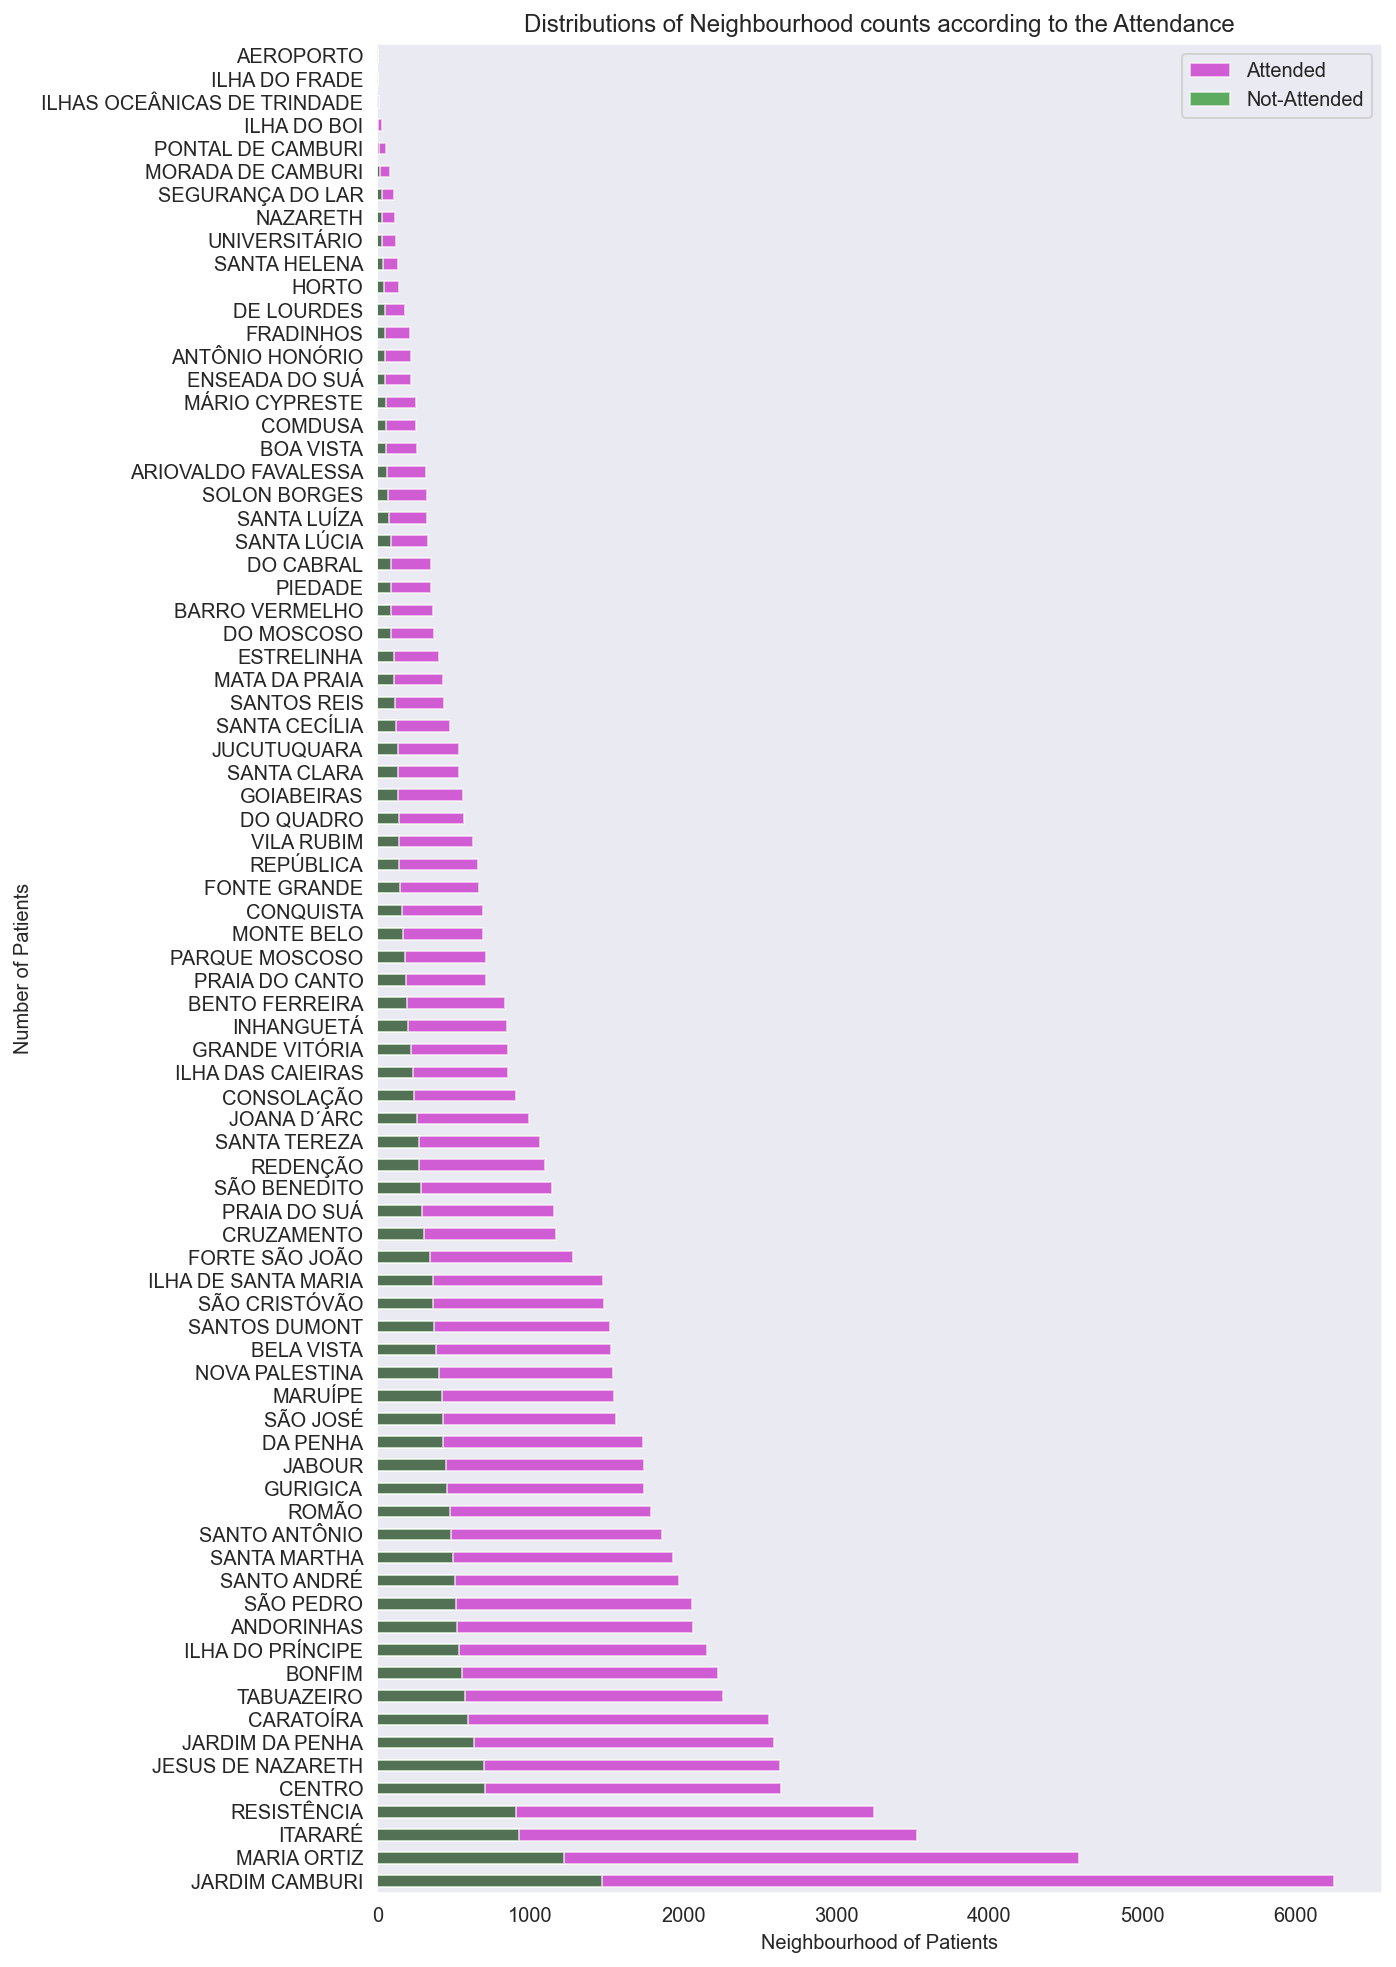

We can see that there is an obvious significance from `Neighbourhood` and how it can affect the patient’s attendance.


In [27]:
fig, ax = plt.subplots(figsize = (9,17))
attended.Neighbourhood.value_counts().plot(kind = 'barh', alpha = 0.6, label = 'Attended', color = 'm')
not_attended.Neighbourhood.value_counts().plot(kind = 'barh', alpha = 0.6, label = 'Not-Attended', color = 'g')
ax.set_title('Distributions of Neighbourhood counts according to the Attendance')
ax.set_xlabel('Neighbourhood of Patients')
ax.set_ylabel('Number of Patients')
ax.legend()
plt.show()
print('We can see that there is an obvious significance from `Neighbourhood` and how it can affect the patient’s attendance.')

**The Previouse solution using Function form**

In [28]:
def plotTwoBars(column1, column2, col1_label, col2_label, title, x_label, y_label, typeofbar, xfig_size = 10, yfig_size = 9, color1 = 'C1', color2 = 'b'):
    fig, ax = plt.subplots(figsize = (xfig_size, yfig_size))
    column1.value_counts().plot(kind = typeofbar, alpha = 0.6, label = col1_label, color = color1)
    column2.value_counts().plot(kind = typeofbar, alpha = 0.6, label = col2_label, color = color2)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    plt.show()

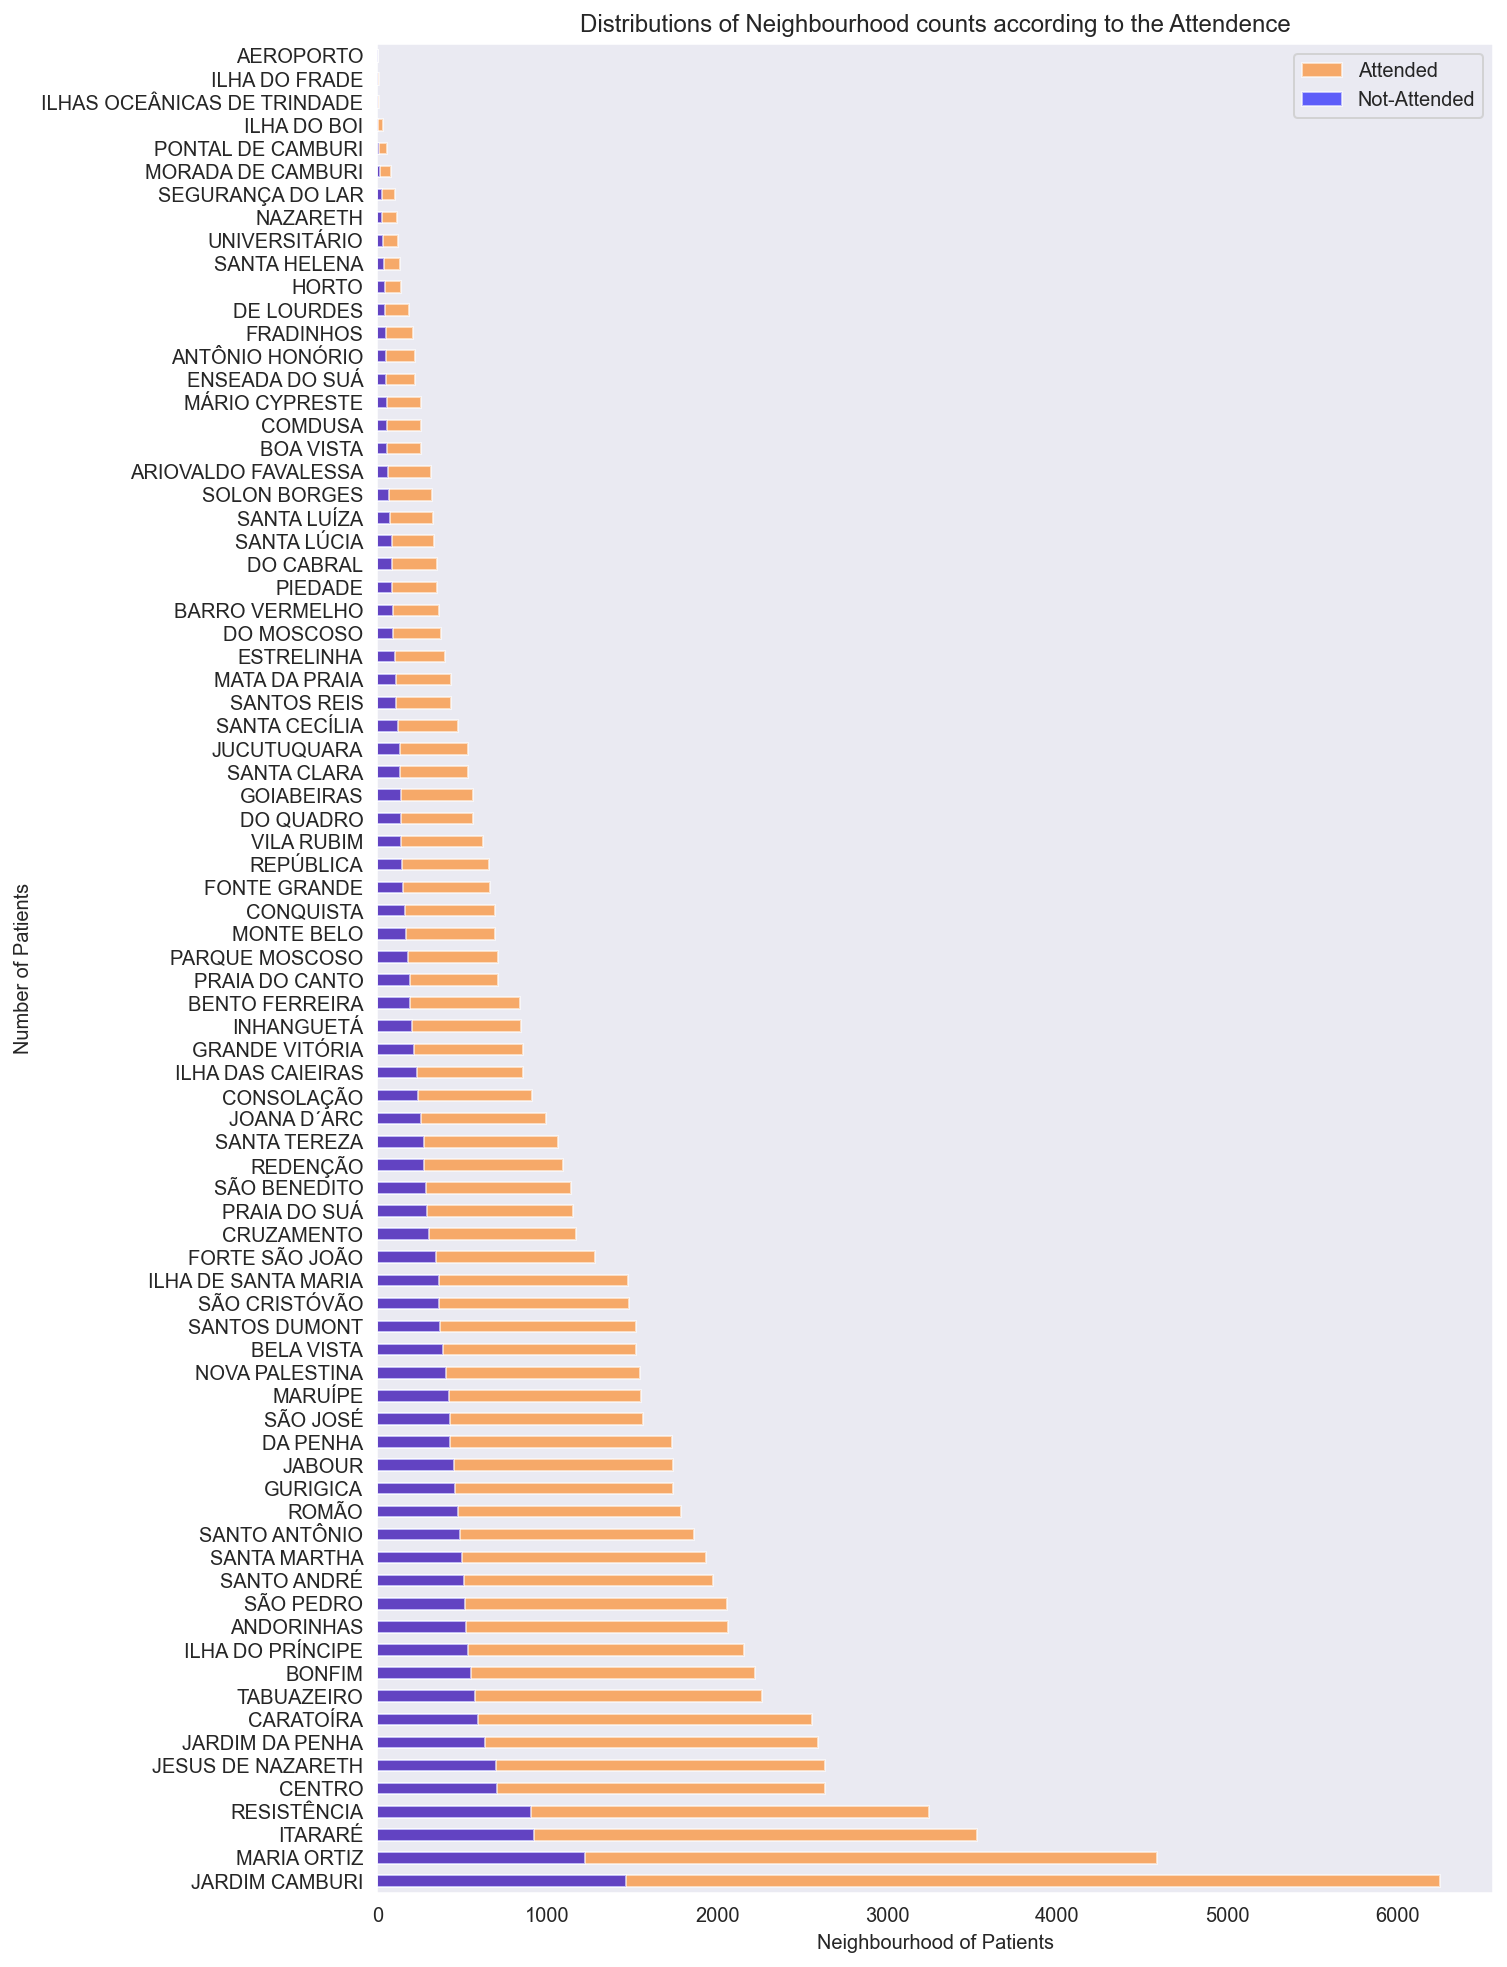

We can see that there is an obvious significance from `Neighbourhood` and how it can affect the patient’s attendance.


In [29]:
col1 = attended.Neighbourhood
col2 = not_attended.Neighbourhood
# calling the function ...
plotTwoBars(col1, col2, "Attended", "Not-Attended",
            'Distributions of Neighbourhood counts according to the Attendence', 'Neighbourhood of Patients',
            'Number of Patients', 'barh', xfig_size = 10, yfig_size = 17)
print('We can see that there is an obvious significance from `Neighbourhood` and how it can affect the patient’s attendance.')

### Research Question Number 6

#### How can the `Age` and `Neighbourhood` can affect on the attendance together?

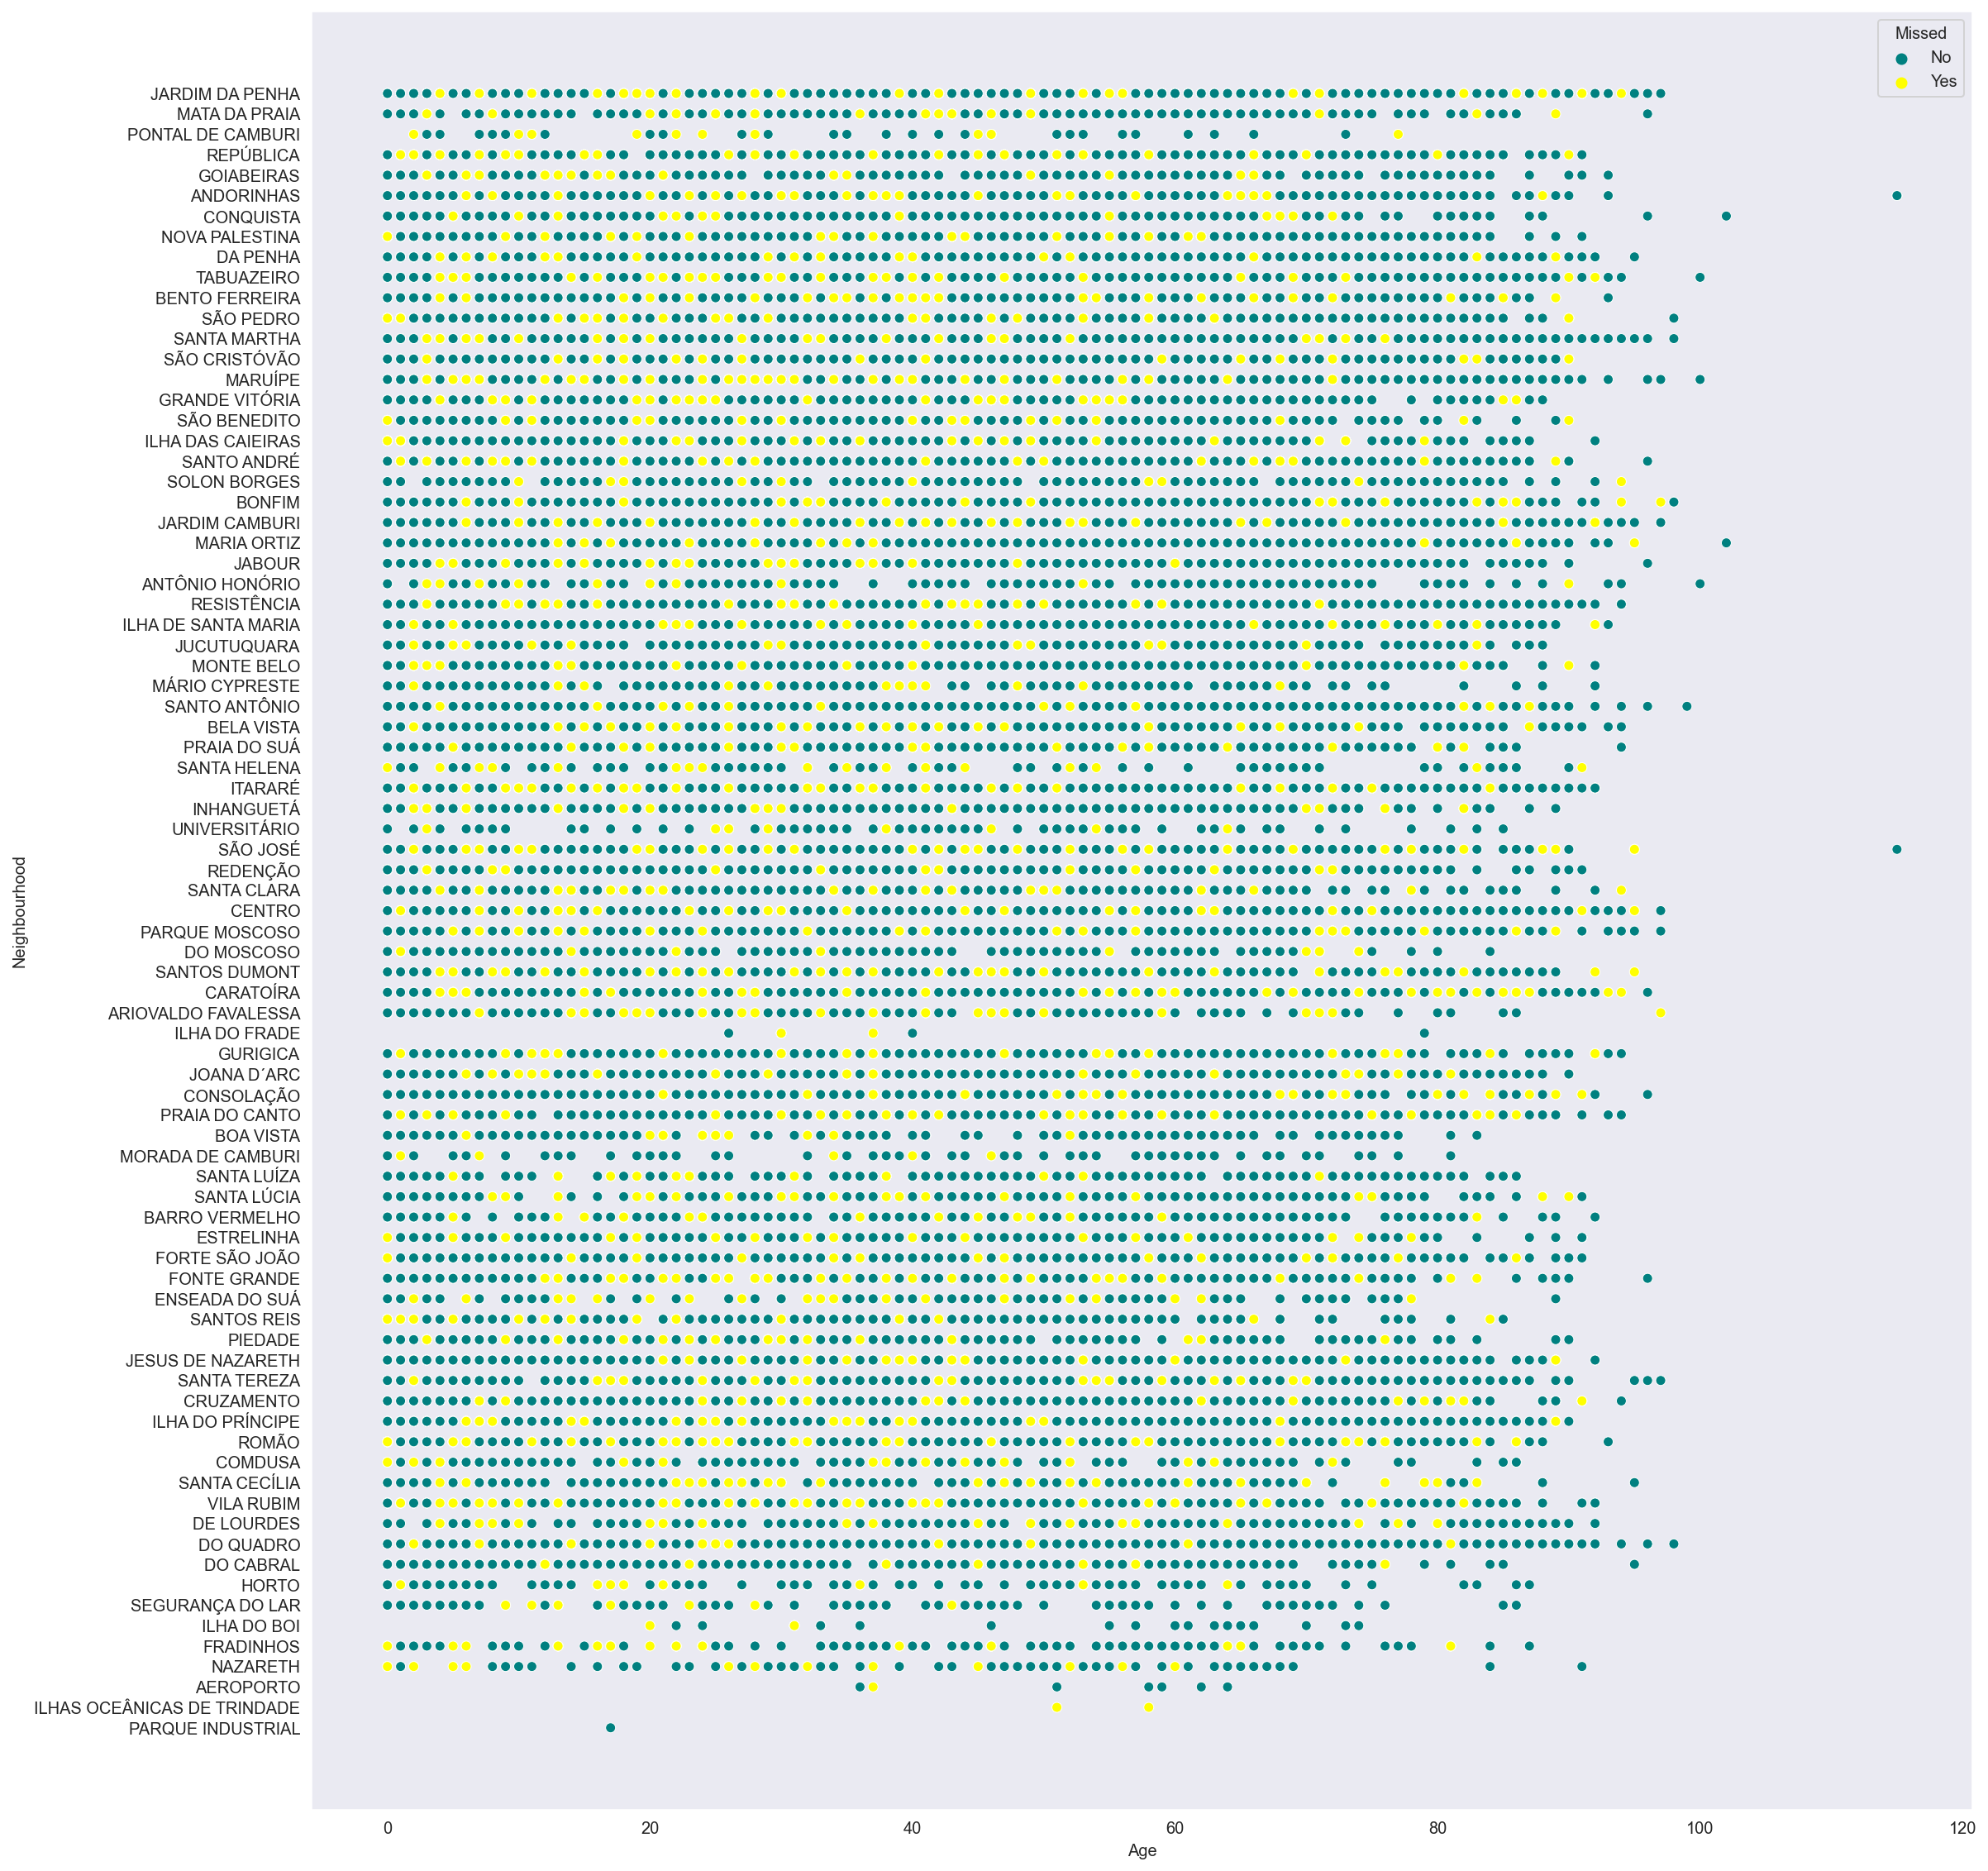

In [30]:
plt.figure(figsize=(18,20))
ax = sns.scatterplot(data = df, x = 'Age', y = 'Neighbourhood', hue = 'Missed', palette=["teal","yellow"])

### Research Question Number 7

#### What is the most and the least chosen `AppointmentDay` in the week according to the Attendance?

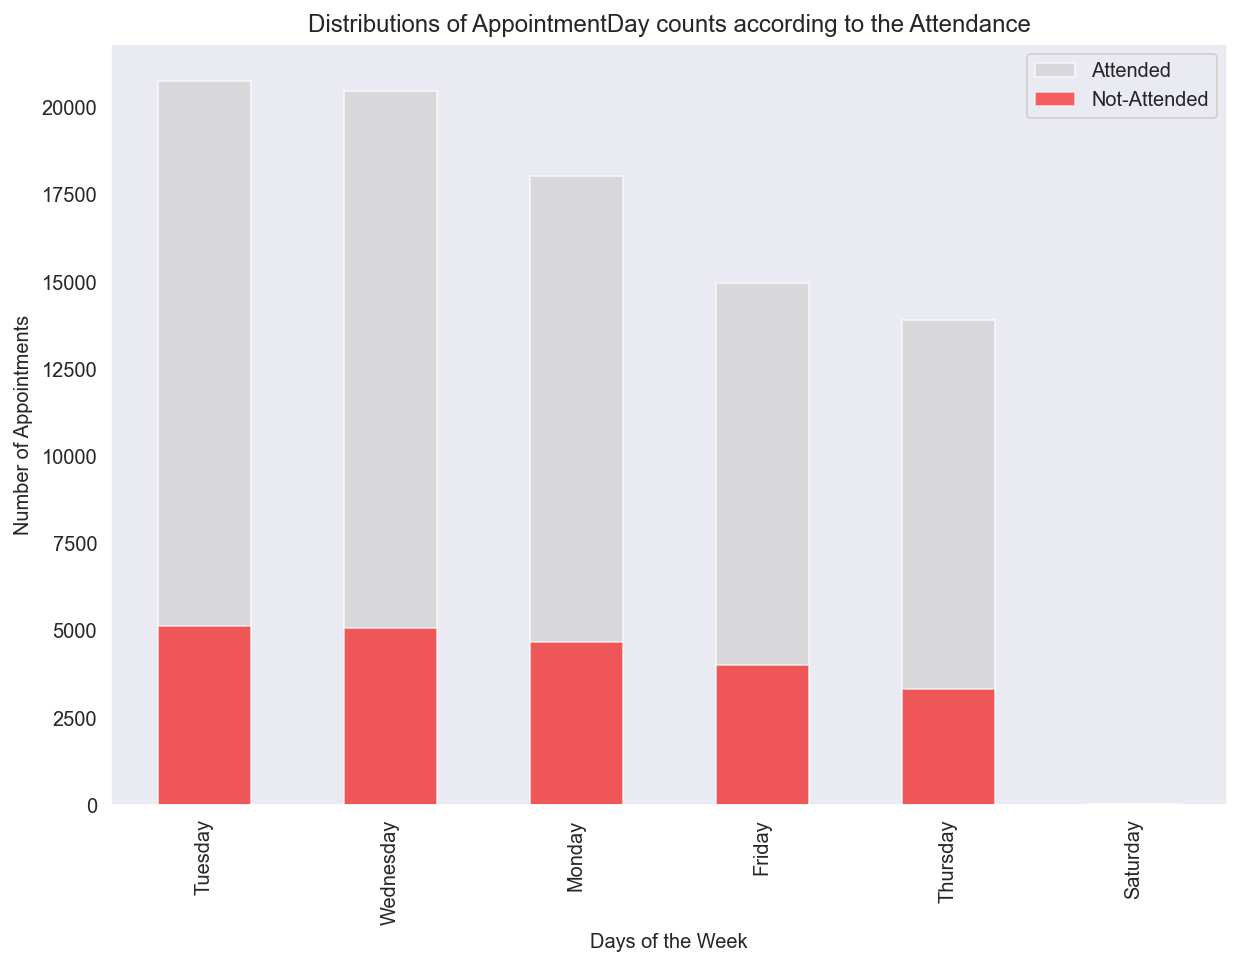

In [31]:
col1 = attended.Day
col2 = not_attended.Day
# calling the function ...
plotTwoBars(col1, col2, "Attended", "Not-Attended",
            'Distributions of AppointmentDay counts according to the Attendance', 'Days of the Week',
            'Number of Appointments', 'bar', xfig_size = 10, yfig_size = 7, color1 = '0.8', color2 = 'r')

As we can see `Tuesday` is the most chosen day for having the appoinment in case for those who attended and those who did not. On the other hand, `Saturday` comes with the least chosen day.

In [32]:
# dia_val = df[df['Diabetes'] == 1].Diabetes.value_counts()
# no_dia_val = df[df['Diabetes'] == 0].Diabetes.value_counts()
# # print(dia_val)
# # print(no_dia_val)
# han_val = df[df['Handicap'] != 0].Handicap.value_counts() # since we have more values other than 1 like 2, 3, 4
# no_han_val = df[df['Handicap'] == 0].Handicap.value_counts()
# # print(hyp_val)
# # print(no_hyp_val)

### Research Question Number 8

#### What is the oldest `Age` recorded in the database? 

In [33]:
max_age = df.Age.max()
print("The Oldest age recorded in the database is '{}'".format(max_age))

The Oldest age recorded in the database is '115'


### Research Question Number 9

#### What is the Central Tendency of the `Age`?

In [34]:
mode_val = df.Age.mode()
median_val = df.Age.median()
mean_val = df.Age.mean()
print("The Mode value of the Age is '{}'".format(mode_val[0]))
print("The Median value of the Age is '{}'".format(int(median_val)))
print("The Mean value of the Age is '{}'".format(int(mean_val)))

The Mode value of the Age is '0'
The Median value of the Age is '37'
The Mean value of the Age is '37'


### Research Question Number 10

#### What is the Measure of Spread for the `Age`?

In [35]:
var_val = df.Age.var()
std_val = df.Age.std()
print("The Variance value of the Age is '{:.3f}'".format(var_val))
print("The Standard Deviation value of the Age is '{:.3f}'".format(std_val))

The Variance value of the Age is '534.080'
The Standard Deviation value of the Age is '23.110'


### Research Question Number 11

#### What are the least 5 `Neighbourhoods` who have the least number of patients?

In [36]:
least_five_neigh = df.Neighbourhood.value_counts().nsmallest(5).to_dict()
print("The least 5 Neighbourhoods with their number of Patients are:")
print(least_five_neigh)
# for place, patient_counts in least_five_neigh.items():
#     print("'{}' \t\t\t '{}'".format(place, patient_counts))

The least 5 Neighbourhoods with their number of Patients are:
{'PARQUE INDUSTRIAL': 1, 'ILHAS OCEÂNICAS DE TRINDADE': 2, 'AEROPORTO': 8, 'ILHA DO FRADE': 10, 'ILHA DO BOI': 35}


<a id='conclusions'></a>
## Conclusions


- The ratio between all patients who attended and who did not attend is equal to **3.95** (A/N)

- No Duplicated rows in the dataset.

- `PatientID` has **48228** Duplicates while `AppointmentID` **has no duplicates**, because the patient can register for different appointments with his `PatientID`.

- `Handicap` value lies in the range of `0` to `4`, according to the disabilities that the patient is suffering from.

### The research questions:

**1)	Dose the type of the `Gender` affect the attendance?**
-	The ratio of those who attended to those who did not attend given that they are `Men` was **4.01** (A/N)
-	 The ratio of those who attended to those who did not attend given that they are `Women` was **3.92** (A/N)
-	We can conclude from that `Females` has **slightly higher** number of absence than `Men`.

**2)	Dose `Alcoholism` affect the attendance?**
-	The Ratio between who Attended and who did not attend given that `Alcoholism` **3.96** (A/N)
-	The Ratio between who Attended and who did not attend given that `NO Alcoholism` **3.95** (A/N)
-	We can conclude from that there **is no significance** effect of `Alcohol` on the attendance.

**3)	Dose receiving `SMS` affect the attendance?**
-	The Ratio between who Attended and who did not attend given that SMS Received **2.63** (A/N)
-	The Ratio between who Attended and who did not attend given that NO SMS Received **4.99** (A/N)
-	We can conclude from that `SMS` **does not affect** the attendance at all, since those who did not receive `SMS` attended and were more than those who have received it and attended.

**4)	What is the distribution of `Ages` according to the attendance?**
-	We can see from the graph that at the first `10` years `Age` actually affects the attendance, also at the range between `45` to `57` years.
-	While the other values of `Age` we can conclude that there is **no significance** effect of `Age` on the attendance.

**5)	Does the `Neighbourhood` effect the attendance?**
-	We can observe from the graph that there is an obvious significance from `Neighbourhood` and how it can affect the patient’s attendance. 

**6)    How can the `Age` and `Neighbourhood` can affect on the attendance together?**
-   We can observe from the graph that there is an obvious significance from `Age` and `Neighbourhood` together and how they can affect on the patient’s attendance.

**7)	What is the most and the least chosen `AppointmentDay` in the week according to the Attendance?**
-	`Tuesday` is the most chosen day for having the appoinment in case for those who attended and those who did not. On the other hand, `Saturday` comes with the least chosen day.

**8)    What is the oldest `Age` recorded in the database?**
-   The Oldest age recorded in the database is `115`

**9)    What is the Central Tendency of the `Age`?**
-   The Mode value of the Age is `0`
-   The Median value of the Age is `37`
-   The Mean value of the Age is `37`

**10)   What is the Measure of Spread for the `Age`?**
-   The Variance value of the Age is `534.080`
-   The Standard Deviation value of the Age is `23.110`

**11)   What are the least 5 `Neighbourhoods` who have the least number of patients?**
-   The least 5 Neighbourhoods with their number of Patients are:

    {`PARQUE INDUSTRIAL`: **1**, `ILHAS OCEÂNICAS DE TRINDADE`: **2**, `AEROPORTO`: **8**, `ILHA DO FRADE`: **10**, `ILHA DO BOI`: **35**}
    
### Limitations:

- Need to do more investigations and statistical analysis on more columns in the future. But due to the shortage of time for this project I could not present and investigate more, however it was very interesting to do more.

- Some of my investigations came out with no significance effect when trying to choose my independent variable such as `Alcohol` and `SMS` on the dependent variable which was `Attendance`.

- Almost all of the data are categorical I could not use more different type of plots like: `jointplot`, `violinplot`, `swarmplot`, etc.
